# Assignment: Functions



## Part 1: Theory Questions

### 1. What is the difference between a function and a method in Python?

A **Function** is a block of code that is called by its name. It can accept data (parameters) and can return data. Functions are defined independently and are not associated with any object.

A **Method**, on the other hand, is also a block of code like a function, but it is called on an object. A method is implicitly passed the object on which it is invoked. It is defined within a class and is associated with the objects of that class.

**Key Difference:** A method is a function that “belongs” to an object.

**Example:**

In [ ]:
# This is a standalone FUNCTION
def my_function(name):
    print(f"Hello, {name}!")

# Calling the function
my_function("World")

# In contrast, here is a METHOD
my_list = [1, 2, 3]
my_list.append(4)  # .append() is a method called on the list object 'my_list'

print(my_list)

### 2. Explain the concept of function arguments and parameters in Python.

The terms 'arguments' and 'parameters' are often used interchangeably, but they have distinct meanings.

* **Parameter:** A parameter is the variable listed inside the parentheses in the function definition. It's a placeholder for the value that will be passed into the function.

* **Argument:** An argument is the actual value that is sent to the function when it is called. This value is assigned to the corresponding parameter.

**Example:**

In [ ]:
# Here, 'num1' and 'num2' are PARAMETERS
def add_numbers(num1, num2):
    return num1 + num2

# When we call the function, 5 and 10 are ARGUMENTS
result = add_numbers(5, 10)

print(f"The result is: {result}")

### 3. What are the different ways to define and call a function in Python?

**Defining a Function:**

1.  **`def` keyword:** This is the most common way. You use the `def` keyword followed by the function name and parentheses `()`.
2.  **`lambda` keyword:** This is used to create small, anonymous functions (functions without a name).

**Calling a Function:**

1.  **Positional Arguments:** Passing arguments in the order the parameters were defined.
2.  **Keyword Arguments:** Passing arguments using the parameter name, so the order doesn't matter.
3.  **Default Arguments:** Functions can have parameters with default values. If you don't pass an argument for that parameter, the default value is used.
4.  **Variable-length Arguments:** You can pass a variable number of arguments using `*args` (for non-keyword arguments) and `**kwargs` (for keyword arguments).

**Example:**

In [ ]:
# Defining a function with default arguments
def greet(name, message="Hello"):
    print(f"{message}, {name}!")

# Calling with positional arguments
greet("Alice")

# Calling with keyword arguments
greet(message="Hi", name="Bob")

# Defining an anonymous function with lambda
multiply = lambda x, y: x * y
print(f"Lambda result: {multiply(5, 4)}")

### 4. What is the purpose of the `return` statement in a Python function?

The `return` statement is used to exit a function and hand back a value to the part of the code that called the function. When a `return` statement is executed, the function terminates immediately.

A function can return:
* A single value (like a number, string, list, etc.).
* Multiple values (which are returned as a tuple).
* Nothing (by using `return` on its own, or by omitting it entirely). A function that doesn't explicitly return a value returns `None` by default.

**Example:**

In [ ]:
def get_circle_area(radius):
    # This function returns the calculated area
    if radius < 0:
        print("Radius cannot be negative.")
        return  # Returns None and exits the function
    area = 3.14159 * (radius ** 2)
    return area

area1 = get_circle_area(5)
print(f"Area for radius 5 is: {area1}")

area2 = get_circle_area(-2)
print(f"Area for radius -2 is: {area2}")

### 5. What are iterators in Python and how do they differ from iterables?

* **Iterable:** An iterable is an object that can be looped over, like a list, tuple, string, or dictionary. Any object that has an `__iter__()` method is an iterable. When you call this method, it returns an iterator.

* **Iterator:** An iterator is an object that represents a stream of data. It produces the next value in the sequence when you call the `__next__()` method on it. An iterator remembers its state (where it is in the sequence). When there are no more items, it raises a `StopIteration` exception.

**Key Difference:** An iterable is an object you can get an iterator from. An iterator is the object that actually does the iterating. All iterators are also iterables, but not all iterables are iterators.

**Example:**

In [ ]:
# my_list is an ITERABLE
my_list = [10, 20, 30]

# We can get an ITERATOR from it using iter()
my_iterator = iter(my_list)

print(type(my_list))
print(type(my_iterator))

# We use next() on the iterator to get elements one by one
print(next(my_iterator))  # Output: 10
print(next(my_iterator))  # Output: 20
print(next(my_iterator))  # Output: 30
# next(my_iterator) would now raise StopIteration

### 6. Explain the concept of generators in Python and how they are defined.

**Generators** are a special type of iterator. They are functions that allow you to declare a function that behaves like an iterator, i.e., it can be used in a `for` loop.

The key feature of a generator is that it doesn't compute and store all its values in memory at once. Instead, it generates values on-the-fly, one at a time, as they are requested. This makes them very memory-efficient for working with large data sets.

**How they are defined:**
Generators are defined like a normal function, but instead of using the `return` statement, they use the `yield` keyword. When the generator function is called, it returns a generator object. The code in the function is only executed when `next()` is called on the generator object. Each time `yield` is encountered, it "pauses" the function's execution and sends a value back to the caller, saving its state for the next call.

**Example:**

In [ ]:
# This is a generator function
def countdown(num):
    print("Starting countdown...")
    while num > 0:
        yield num  # Pauses here and returns a value
        num -= 1

# Create the generator object
counter = countdown(3)

# Iterate through the values yielded by the generator
for value in counter:
    print(value)

### 7. What are the advantages of using generators over regular functions?

Generators offer several significant advantages over regular functions that return a list:

1.  **Memory Efficiency:** This is the biggest advantage. A generator produces items one at a time and only when required. A regular function has to create the entire list and store it in memory before returning it. This is crucial when dealing with very large or infinite sequences.

2.  **Lazy Evaluation:** Generators compute values only when they are needed (on-demand). This can lead to better performance if you only need a few values from a potentially long sequence, as you don't waste time computing the values you never use.

3.  **Representing Infinite Streams:** Generators are a natural way to represent an infinite stream of data. You can't store an infinite list in memory, but you can have a generator that produces values forever.

**Example:** Let's compare generating a million numbers.


In [ ]:
import sys

# Regular function (consumes a lot of memory)
def first_n_regular(n):
    nums = []
    num = 0
    while num < n:
        nums.append(num)
        num += 1
    return nums

# Generator function (very memory efficient)
def first_n_generator(n):
    num = 0
    while num < n:
        yield num
        num += 1

n = 1_000_000

# Calculate memory usage
regular_list = first_n_regular(n)
generator_obj = first_n_generator(n)

print(f"Memory used by list: {sys.getsizeof(regular_list)} bytes")
print(f"Memory used by generator: {sys.getsizeof(generator_obj)} bytes")

### 8. What is a lambda function in Python and when is it typically used?

A **lambda function** is a small, anonymous function defined with the `lambda` keyword. It can take any number of arguments, but can only have one expression. The expression is evaluated and returned.

**Syntax:** `lambda arguments: expression`

**When to use it:**
Lambda functions are typically used when you need a simple, one-line function for a short period of time. They are commonly used as arguments to higher-order functions (functions that take other functions as arguments), such as `map()`, `filter()`, and `sorted()`.

**Example:** Using a lambda function as the key for sorting.

In [ ]:
# A list of tuples (city, population)
cities = [('New York', 8_400_000), ('Los Angeles', 3_900_000), ('Chicago', 2_700_000)]

# Sort the list of cities based on population (the second element of the tuple)
# We use a lambda function to tell sorted() which element to look at.
sorted_cities = sorted(cities, key=lambda city: city[1])

print(sorted_cities)

### 9. Explain the purpose and usage of the `map()` function in Python.

The `map()` function is a built-in Python function that applies a given function to each item of an iterable (like a list, tuple, etc.) and returns a map object (which is an iterator).

**Syntax:** `map(function, iterable, ...)`

**Purpose:** Its main purpose is to transform a collection of items without using an explicit loop. It provides a concise and efficient way to perform the same operation on every element in a sequence.

**Usage:** You provide `map()` with a function and one or more iterables. `map()` will then call this function for each item from the iterable(s) and yield the results.

**Example:** Squaring every number in a list.

In [ ]:
numbers = [1, 2, 3, 4, 5]

def square(n):
    return n * n

# Use map() to apply the square function to each number
squared_numbers_iterator = map(square, numbers)

# The result is an iterator, so we convert it to a list to see the values
squared_numbers_list = list(squared_numbers_iterator)

print(squared_numbers_list)

### 10. What is the difference between `map()`, `reduce()`, and `filter()` functions in Python?

These three functions are powerful tools for functional programming in Python.

1.  **`map(function, iterable)`:**
    * **Purpose:** To transform each element of an iterable.
    * **Operation:** It applies a `function` to every item in the `iterable`.
    * **Returns:** An iterator containing the transformed elements. The output iterable has the same length as the input iterable.
    * **Example:** `map(lambda x: x*2, [1, 2, 3])` -> `[2, 4, 6]`

2.  **`filter(function, iterable)`:**
    * **Purpose:** To select elements from an iterable that meet a certain condition.
    * **Operation:** It applies a `function` that returns a boolean (`True` or `False`) to every item in the `iterable`. It keeps only the items for which the function returns `True`.
    * **Returns:** An iterator containing only the elements that passed the condition. The output iterable's length is less than or equal to the input's.
    * **Example:** `filter(lambda x: x > 2, [1, 2, 3, 4])` -> `[3, 4]`

3.  **`reduce(function, iterable)`:**
    * **Note:** `reduce` is not a built-in function anymore; it needs to be imported from the `functools` module.
    * **Purpose:** To cumulatively apply an operation to the items of an iterable, reducing the iterable to a single final value.
    * **Operation:** It applies a `function` of two arguments cumulatively to the items of the `iterable`, from left to right.
    * **Returns:** A single, accumulated value.
    * **Example:** `reduce(lambda x, y: x + y, [1, 2, 3, 4])` -> `( ( (1+2) + 3) + 4) = 10`

### 11. Using pen & Paper write the internal mechanism for sum operation using reduce function on this given list:[47,11,42,13];

![answer reducxe.jpg](<attachment:answer reducxe.jpg>)
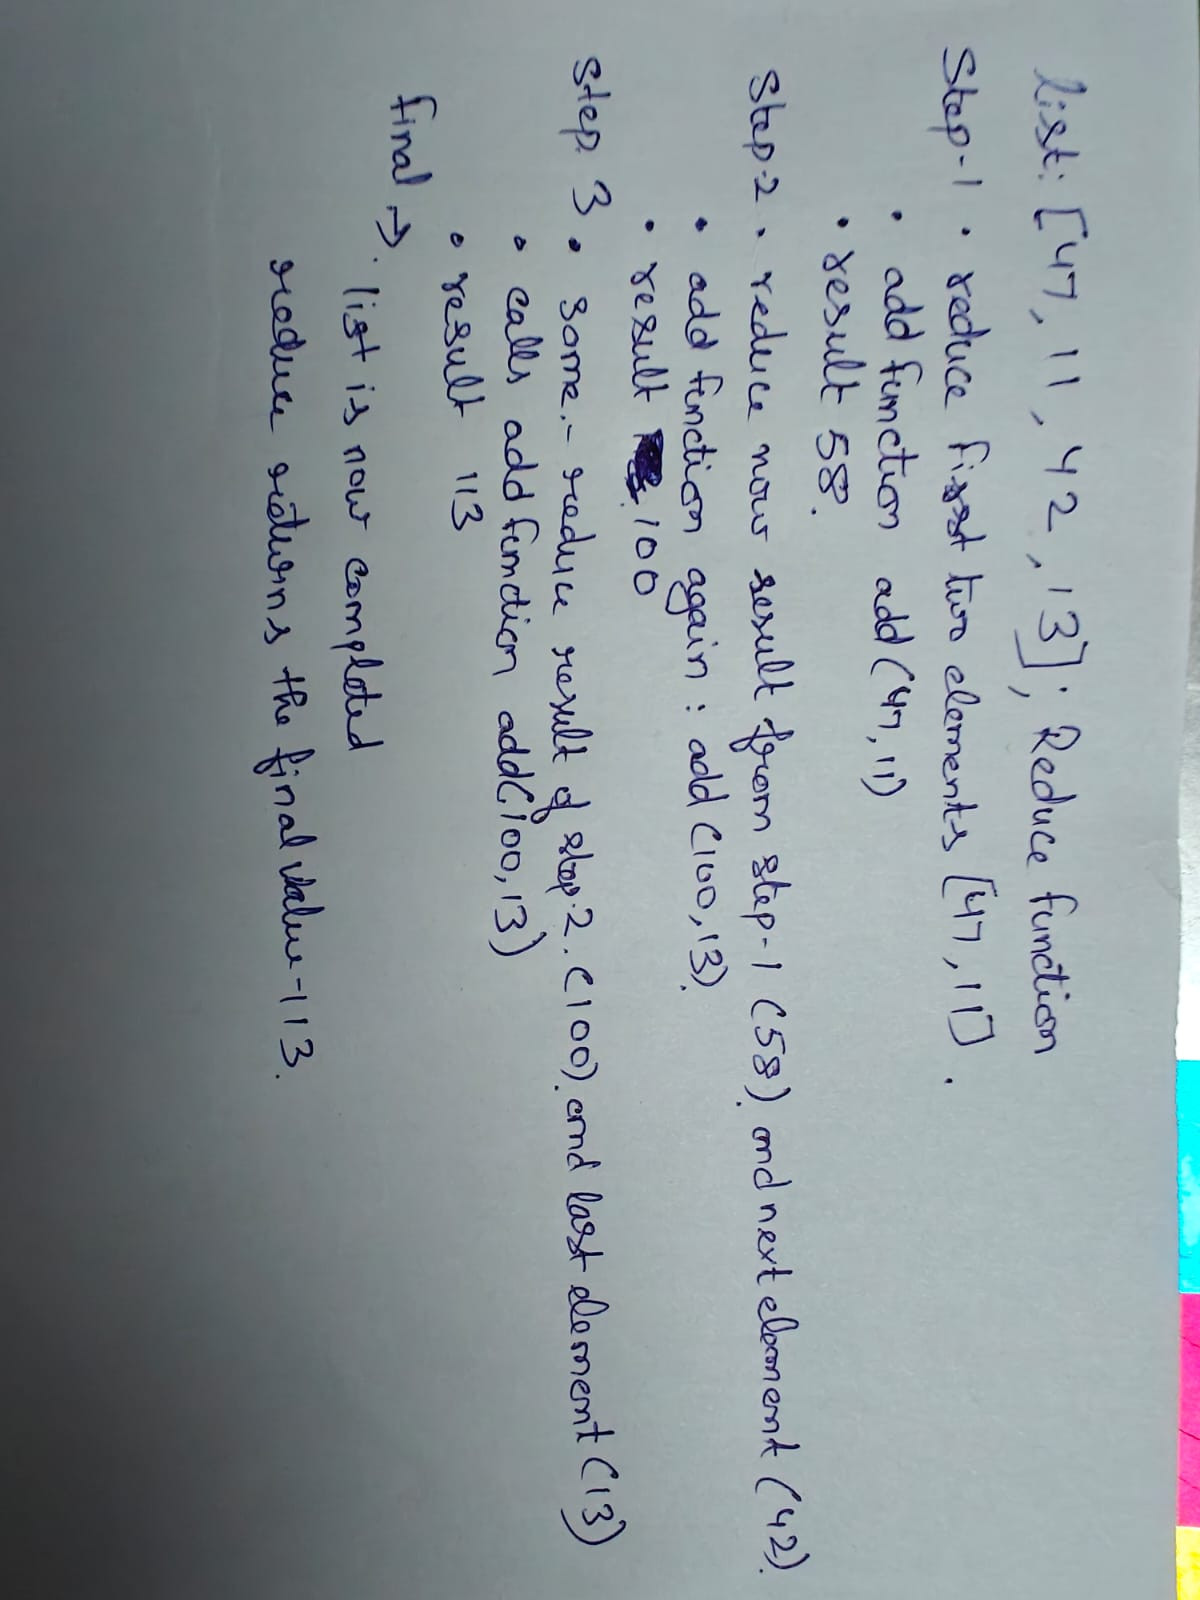

## Part 2: Practical Questions

### 1. Write a Python function that takes a list of numbers as input and returns the sum of all even numbers in the list.

In [ ]:
def sum_even_numbers(numbers):
    """Calculates the sum of even numbers in a list."""
    total = 0
    for num in numbers:
        # Check if the number is even
        if num % 2 == 0:
            total += num
    return total

# --- Example Usage ---
my_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
even_sum = sum_even_numbers(my_list)
print(f"The original list is: {my_list}")
print(f"The sum of even numbers is: {even_sum}")

### 2. Create a Python function that accepts a string and returns the reverse of that string.

In [ ]:
def reverse_string(s):
    """Reverses a given string using slicing."""
    # String slicing [::-1] is a concise way to reverse a string in Python
    return s[::-1]

# --- Example Usage ---
original_string = "Hello, World!"
reversed_str = reverse_string(original_string)
print(f"The original string is: '{original_string}'")
print(f"The reversed string is: '{reversed_str}'")

### 3. Implement a Python function that takes a list of integers and returns a new list containing the squares of each number.

In [ ]:
def square_numbers(numbers):
    """Returns a new list with the square of each number from the input list."""
    # Using a list comprehension for a clean and Pythonic solution
    return [num ** 2 for num in numbers]

# --- Example Usage ---
int_list = [1, 2, 3, 4, 5]
squared_list = square_numbers(int_list)
print(f"The original list is: {int_list}")
print(f"The list of squared numbers is: {squared_list}")

### 4. Write a Python function that checks if a given number is prime or not from 1 to 200.

In [ ]:
def is_prime(num):
    """Checks if a number is prime."""
    # Prime numbers must be greater than 1
    if num <= 1:
        return False
    # Check for factors from 2 up to the square root of the number
    for i in range(2, int(num**0.5) + 1):
        if num % i == 0:
            return False
    return True

def find_primes_in_range(start, end):
    """Finds all prime numbers within a given range."""
    prime_numbers = []
    for number in range(start, end + 1):
        if is_prime(number):
            prime_numbers.append(number)
    return prime_numbers

# --- Example Usage ---
primes_up_to_200 = find_primes_in_range(1, 200)
print(f"Prime numbers from 1 to 200 are:\n{primes_up_to_200}")

### 5. Create an iterator class in Python that generates the Fibonacci sequence up to a specified number of terms.

In [ ]:
class FibonacciIterator:
    """An iterator for generating the Fibonacci sequence."""
    def __init__(self, max_terms):
        self.max_terms = max_terms
        self.current_term = 0
        self.a, self.b = 0, 1

    def __iter__(self):
        # The __iter__ method returns the iterator object itself
        return self

    def __next__(self):
        # The __next__ method returns the next value
        if self.current_term < self.max_terms:
            fib_number = self.a
            self.a, self.b = self.b, self.a + self.b
            self.current_term += 1
            return fib_number
        else:
            # No more terms to generate, so raise StopIteration
            raise StopIteration

# --- Example Usage ---
num_terms = 10
fib_iterator = FibonacciIterator(num_terms)

print(f"The first {num_terms} Fibonacci numbers are:")
for number in fib_iterator:
    print(number, end=" ")

### 6. Write a generator function in Python that yields the powers of 2 up to a given exponent.

In [ ]:
def powers_of_two(max_exponent):
    """Generator function that yields powers of 2."""
    for i in range(max_exponent + 1):
        yield 2 ** i

# --- Example Usage ---
max_exp = 8
power_generator = powers_of_two(max_exp)

print(f"Powers of 2 up to an exponent of {max_exp}:")
for value in power_generator:
    print(value, end=" ")

### 7. Implement a generator function that reads a file line by line and yields each line as a string.

In [ ]:
def read_file_line_by_line(file_path):
    """Generator that reads a file and yields each line."""
    try:
        with open(file_path, 'r') as file:
            for line in file:
                # .strip() removes leading/trailing whitespace, including the newline character
                yield line.strip()
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")

# --- Example Usage ---
# First, let's create a dummy file to read
with open("sample.txt", "w") as f:
    f.write("This is the first line.\n")
    f.write("This is the second line.\n")
    f.write("And this is the third.\n")

file_reader_gen = read_file_line_by_line("sample.txt")

print("Reading from 'sample.txt':")
for line in file_reader_gen:
    print(line)

### 8. Use a lambda function in Python to sort a list of tuples based on the second element of each tuple.

In [ ]:
# List of tuples (item, price)
items = [('Apple', 2.5), ('Banana', 1.2), ('Orange', 3.0), ('Grapes', 2.8)]

print(f"Original list:\n{items}\n")

# The `sorted()` function takes a `key` argument.
# We provide a lambda function that tells sorted() to use the second element (index 1)
# of each tuple as the basis for sorting.
sorted_items = sorted(items, key=lambda item: item[1])

print(f"List sorted by price (second element):\n{sorted_items}")

### 9. Write a Python program that uses `map()` to convert a list of temperatures from Celsius to Fahrenheit.

In [ ]:
celsius_temps = [0, 10, 25, 30, 100]

# The formula for Celsius to Fahrenheit is: F = (C * 9/5) + 32
# We can implement this logic in a lambda function.

# Use map() to apply the conversion lambda to each temperature in the list
fahrenheit_temps_iterator = map(lambda c: (c * 9/5) + 32, celsius_temps)

# Convert the map object to a list to see the results
fahrenheit_temps_list = list(fahrenheit_temps_iterator)

print(f"Temperatures in Celsius: {celsius_temps}")
print(f"Temperatures in Fahrenheit: {fahrenheit_temps_list}")

### 10. Create a Python program that uses `filter()` to remove all the vowels from a given string.

In [ ]:
input_string = "Hello, this is a test string to filter vowels."
vowels = "aeiouAEIOU"

# The filter function will keep only the characters for which the lambda returns True.
# The lambda checks if a character is NOT in the vowels string.
consonants_iterator = filter(lambda char: char not in vowels, input_string)

# Join the characters from the iterator back into a single string
result_string = "".join(consonants_iterator)

print(f"Original string: '{input_string}'")
print(f"String after removing vowels: '{result_string}'")

### 11. Imagine an accounting routine used in a book shop. Write a Python program, which returns a list with 2-tuples. Each tuple consists of the order number and the product of the price per item and the quantity. The product should be increased by 10,- € if the value of the order is smaller than 100,00 €. Write a Python program using lambda and map.

The data looks like this:
```
Order Number, Book Title and Author, Quantity, Price per Item
34587, Learning Python by Mark Lutz, 4, 40.95
98762, Programming Python by Mark Lutz, 5, 56.80
77226, Head First Python by Paul Barry, 3, 32.95
88112, Einführung in Python3 by Bernd Klein, 3, 24.99
```

In [1]:
# The data structured as a list of lists
orders = [
    [34587, "Learning Python, Mark Lutz", 4, 40.95],
    [98762, "Programming Python, Mark Lutz", 5, 56.80],
    [77226, "Head First Python, Paul Barry", 3, 32.95],
    [88112, "Einführung in Python3, Bernd Klein", 3, 24.99]
]

# We will use map and a lambda function to process this list.
# The lambda function will take a single order (a sublist) as input.

# Let's break down the lambda function:
# 1. `order[2] * order[3]` calculates the initial total price.
# 2. We check `if total < 100`. If it is, we add 10.
# 3. Finally, we return a tuple `(order[0], final_total)`.

final_invoices = list(map(
    lambda order: (
        order[0], 
        (order[2] * order[3] + 10) if (order[2] * order[3] < 100) else (order[2] * order[3])
    ),
    orders
))

# To make it more readable, let's round the final values
final_invoices_rounded = [(order_num, round(total, 2)) for order_num, total in final_invoices]

print("Original Orders Data:")
for order in orders:
    print(order)

print("\nFinal List of Tuples (Order Number, Final Price):")
for invoice in final_invoices_rounded:
    print(invoice)

Original Orders Data:
[34587, 'Learning Python, Mark Lutz', 4, 40.95]
[98762, 'Programming Python, Mark Lutz', 5, 56.8]
[77226, 'Head First Python, Paul Barry', 3, 32.95]
[88112, 'Einführung in Python3, Bernd Klein', 3, 24.99]

Final List of Tuples (Order Number, Final Price):
(34587, 163.8)
(98762, 284.0)
(77226, 108.85)
(88112, 84.97)
